### 텐서플로 딥러닝

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
w=tf.Variable(2.0)
b=tf.Variable(0.7)

x=1.5
y=w*x+b
print(y)

tf.Tensor(3.7, shape=(), dtype=float32)


In [ ]:
import numpy as np
x=tf.constant([1,2,3,4,5,6,7,8,9,10],dtype=tf.float32)
y=tf.constant([3,5,5,6,7,7,8,9,9,10],dtype=tf.float32)

w=tf.Variable(tf.random.normal(shape=[1]))
b=tf.Variable(tf.random.normal(shape=[1]))
print(w.numpy(),b.numpy())

def compute_loss():
  y_pred = w*x+b
  loss = tf.reduce_mean((y-y_pred)**2)
  return loss
print(compute_loss())

[-1.4080884] [0.6390882]
tf.Tensor(233.27316, shape=(), dtype=float32)


In [ ]:
optimizer = tf.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
    optimizer.minimize(compute_loss,var_list=[w,b])
    if i%100==0:
      print(i,"loss:",compute_loss().numpy(),"\n")
print("final w:",w)
print("final b:",b)

0 loss: 218.33049 

100 loss: 0.15799162 

200 loss: 0.14519563 

300 loss: 0.14308664 

400 loss: 0.14219931 

500 loss: 0.1419107 

600 loss: 0.14183639 

700 loss: 0.14182109 

800 loss: 0.14181852 

900 loss: 0.14181831 

final w: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.70910925], dtype=float32)>
final b: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9998767], dtype=float32)>


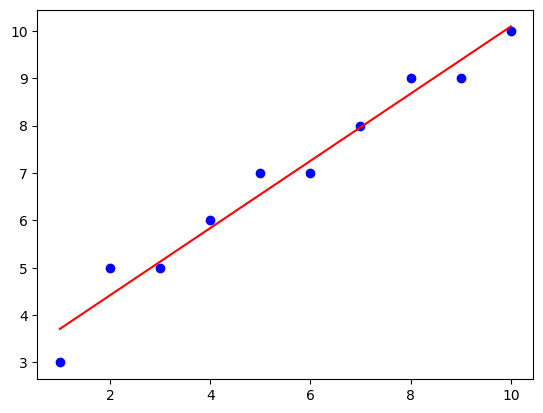

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,y,'bo')
plt.plot(x,w*x+b,'red')
plt.show()

### Keras Layer를 이용한 모델 생성

In [ ]:
import tensorflow as tf
import numpy as np

x=tf.constant([1,2,3,4,5,6,7,8,9,10],dtype=tf.float32)
y=tf.constant([3,5,5,6,7,7,8,9,9,10],dtype=tf.float32)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10,activation='tanh',input_shape=(1,)))
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.07)
model.compile(loss='mse',optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x, y, epochs=1000, verbose=0)

In [ ]:
model.predict(x)

1/1 [==============================] - 0s 137ms/step


array([[3.0099075],
       [4.7963023],
       [5.36985  ],
       [5.9674087],
       [6.632286 ],
       [7.337123 ],
       [8.040767 ],
       [8.710338 ],
       [9.329945 ],
       [9.889278 ]], dtype=float32)

1/1 [==============================] - 0s 45ms/step


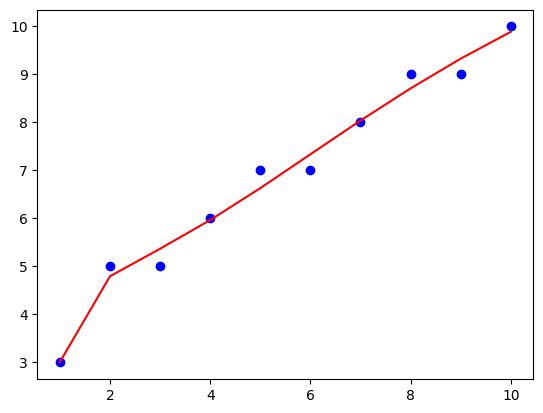

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,y,'bo')
plt.plot(x,model.predict(x),'red')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

x=tf.constant([1,2,3,4,5,6,7,8,9,10],dtype=tf.float32)
y=tf.constant([3,5,5,6,7,7,8,9,9,10],dtype=tf.float32)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10,activation='tanh',input_shape=(1,)))
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)

In [ ]:
def train_step(x_batch,y_batch):
  with tf.GradientTape() as tape:
    predictions = model(x_batch,training=True)
    loss = loss_fn(y_batch,predictions)
  gradients = tape.gradient(loss,model.trainable_variables)
  optimizer.apply_gradients(zip(gradients,model.trainable_variables))
  print(model.trainable_variables)
  return loss

def test_step(x_batch,y_batch):
  predictions = model(x_batch, training=False)
  loss = loss_fn(y_batch,predictions)
  return loss

In [ ]:
batch_size=1
for epoch in range(1001):
  print("\n----------\nepoch ",epoch)
  for i in range(0,len(x),batch_size):
    #2차원 데이터가 되게 하고, 행의 개수는 배치 사이즈에 따라 달라지게 한다.
    x_batch = tf.reshape(x[i:i+batch_size],(-1,1))
    y_batch = tf.reshape(x[i:i+batch_size],(-1,1))
    train_loss = train_step(x_batch, y_batch)
  print("one train data Loss",train_loss.numpy())

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
       [-0.0159455 ],
       [ 0.24540257],
       [ 1.015528  ],
       [ 0.7668418 ],
       [-0.6370218 ],
       [ 0.6954306 ],
       [-0.5325495 ],
       [-0.7249684 ]], dtype=float32)>, <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([2.4150581], dtype=float32)>]
[<tf.Variable 'dense_2/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[ 2.223609 ,  1.8543408, -1.0381192,  1.9812405,  1.8737794,
         1.5728629, -1.1492181,  1.5350716, -2.0634668, -1.9648716]],
      dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=
array([ -4.6123075 ,   0.38675025,  -1.3982321 ,   3.5066164 ,
       -12.608054  , -13.405123  ,  -1.1487064 , -14.691568  ,
         7.447195  ,   9.631041  ], dtype=float32)>, <tf.Variable 'dense_3/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[ 0.79871756],
       [ 1.8386981 ],
       [-0.01851341],
       [ 0.24799748],
       [ 0.99454284],
       [ 0.7554341 ],

In [ ]:
test_loss = test_step(tf.reshape(x,(-1,1)),tf.reshape(y,(-1,1)))
print("Test Loss:",test_loss.numpy())

Test Loss: 1.3983663


In [ ]:
model.predict(x)

1/1 [==============================] - 0s 58ms/step


array([[1.6279573],
       [2.686483 ],
       [3.71447  ],
       [4.6772747],
       [5.7767234],
       [6.2211256],
       [7.564663 ],
       [7.999747 ],
       [8.932501 ],
       [9.778687 ]], dtype=float32)

1/1 [==============================] - 0s 21ms/step


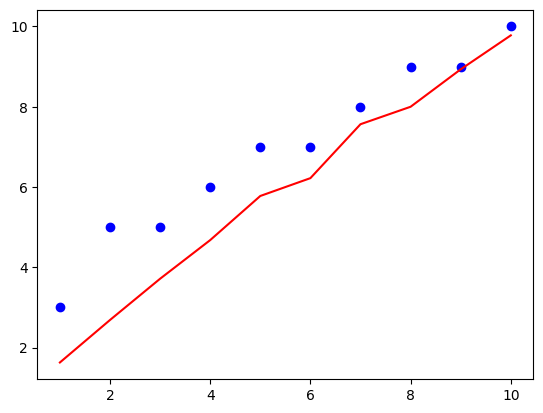

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,y,'bo')
plt.plot(x,model.predict(x),'red')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

data = np.array([1,2,3,4,5])

dataset = tf.data.Dataset.from_tensor_slices(data)
print(dataset)
print(type(dataset))

for element in dataset:
  print(element)

for element in dataset:
  print(element.numpy())

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
1
2
3
4
5


In [ ]:
import tensorflow as tf
import numpy as np

#예제 데이터 생성
x_data = np.random.random((100,32))
y_data = np.random.randint(0,10,(100,))
print(x_data,y_data)

dataset = tf.data.Dataset.from_tensor_slices((x_data,y_data))
print(dataset)
def preprocess(x,y):
  x=tf.cast(x,tf.float32)
  y=tf.cast(y,tf.int64)
  return x,y



[[0.5159167  0.75187798 0.72905638 ... 0.13667027 0.01697027 0.97105929]
 [0.71422858 0.43392437 0.73947678 ... 0.45538083 0.12579997 0.47617875]
 [0.29870842 0.54162595 0.97432411 ... 0.59021339 0.86710788 0.5416311 ]
 ...
 [0.01270006 0.58599683 0.71327921 ... 0.87924101 0.72597429 0.61049737]
 [0.60320545 0.54602281 0.17394794 ... 0.59150747 0.4288894  0.57346848]
 [0.55048722 0.64917356 0.08429943 ... 0.83485851 0.12695223 0.83653155]] [4 3 4 2 6 8 1 0 6 9 1 1 3 1 7 3 4 3 1 0 3 7 8 6 3 9 5 1 2 2 2 8 9 7 2 0 3
 8 9 0 1 9 6 6 0 1 5 1 0 8 9 8 4 6 9 0 2 1 5 0 0 7 5 0 3 6 0 5 1 2 9 9 2 9
 9 3 5 5 0 2 3 0 9 8 1 8 8 2 8 5 4 3 0 9 6 8 5 7 4 4]
<_TensorSliceDataset element_spec=(TensorSpec(shape=(32,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [ ]:
dataset = dataset.map(preprocess)
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(32)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64,activation='relu', input_shape=(32,)),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(dataset,epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 4ms/step - loss: 2.4496 - accuracy: 0.0800
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 2.3966 - accuracy: 0.1200
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 2.3599 - accuracy: 0.1100
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 2.3375 - accuracy: 0.1100
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 2.3177 - accuracy: 0.1300
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 2.2982 - accuracy: 0.1600
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 2.2865 - accuracy: 0.1800
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 2.2748 - accuracy: 0.1900
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 2.2657 - accuracy: 0.1800
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 2.2558 - accuracy: 0.1900


### 딥러닝 분류모델

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 리눅스 명령어
# 코랩은 리룩스 서버 - CemtOS(보안이 좋음) / Ubuntu (호환성, 대중성)
# 코랩이 우분투인 이유는 딥러닝을 돌릴수 있는 것은 우분투
# ! 랑 % 를 쓰는 기호가 있다 범위적으로 보면 ! > % 이런 느낌
!ls

 ants_bees   dlib      img_align_celeba_small		  mnist_jpg   opencv
 cats_dogs   facades   Intel_Image_Classification_small   models      YOLO
 CIFAR10     images    iris.csv				  OCR	     '인공지능 고급-시각 1_1.ipynb'


In [ ]:
%cd /content/gdrive/MyDrive/pytest_img

/content/gdrive/MyDrive/pytest_img


In [ ]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 원본 데이터의 100%를 랜덤하게 불러온다
# frac= 0.2(20%) / 0.5(50%) / 1 (100%)
df =  df.sample(frac=1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
34,4.9,3.1,1.5,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
113,5.7,2.5,5.0,2.0,virginica
32,5.2,4.1,1.5,0.1,setosa
16,5.4,3.9,1.3,0.4,setosa


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 34 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None
       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


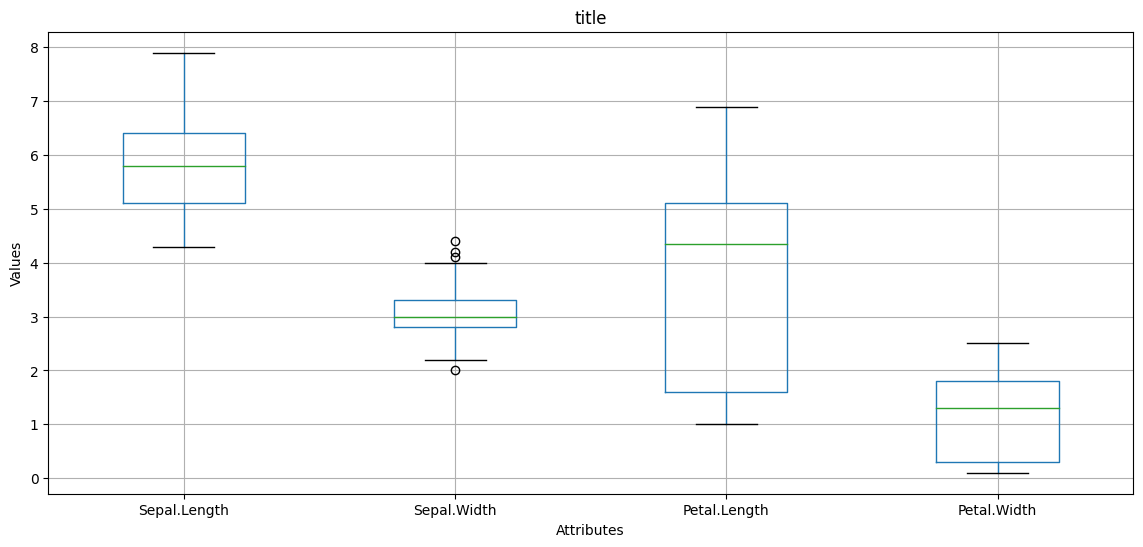

In [ ]:
import matplotlib.pyplot as plt
# Boxplot 그리기
plt.figure(figsize=(14, 6))
df.boxplot()
plt.title('title')
plt.xlabel('Attributes') #속성은, 꽃받침, 꽃입의 길이 및 너비가 주요 항목이다.
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [ ]:
# 독립변수와 종속변수 분리
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]

# 훈련 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.head())
print("************")
print(X_test.head())

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
51            6.4          3.2           4.5          1.5
147           6.5          3.0           5.2          2.0
96            5.7          2.9           4.2          1.3
135           7.7          3.0           6.1          2.3
81            5.5          2.4           3.7          1.0
************
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
36           5.5          3.5           1.3          0.2
40           5.0          3.5           1.3          0.3
15           5.7          4.4           1.5          0.4
80           5.5          2.4           3.8          1.1
65           6.7          3.1           4.4          1.4


In [ ]:
# 종속변수 확인
# 문자열로 되어 있음을 확인한다
# 이것을 숫자형으로 변환한 뒤, 원한인코딩을 한다. (문자열 -> 숫자형 -> one-hot)

print(y_train)

51     versicolor
147     virginica
96     versicolor
135     virginica
81     versicolor
          ...    
137     virginica
44         setosa
7          setosa
126     virginica
3          setosa
Name: Species, Length: 112, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(y_train) # 훈련 데이터가 아닌 전체 데이터셋을 넣어도 된다.
y_train = e.transform(y_train)
print("y_train: ", y_train)

# pd.get_dummies() 는 숫자와 문자를 모두 받을 수 있지만, 여기에서 사용할 to_categorical()은 숫자형만 받는다

y_train:  [1 2 1 2 1 1 0 1 2 0 1 1 0 1 2 2 2 0 0 1 2 1 1 0 1 1 1 2 0 0 1 0 0 1 2 2 1
 1 0 0 2 0 2 2 0 0 2 0 0 1 0 2 2 2 1 2 0 2 1 0 2 0 1 1 2 1 2 1 2 2 2 1 2 0
 0 1 1 2 2 0 0 1 2 2 0 2 2 1 2 2 1 1 2 0 0 1 0 1 2 1 1 0 2 1 2 2 1 2 0 0 2
 0]


In [ ]:
# 변환 결과를 확인한다
y_train_transformed = e.transform(["setosa", "versicolor", "virginica"])
print(e.classes_[0], y_train_transformed[0], ",", e.classes_[1], y_train_transformed[1], ",", e.classes_[2], y_train_transformed[2])

setosa 0 , versicolor 1 , virginica 2


In [ ]:
# 정렬 순이므로 순서가 바뀌지는 않는다, e.classes_를 출력해도 된다.
e.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
#원-핫 인코딩
#0, 1, 2 중 하나를 예측하는 다중분류 상황이므로 원-핫 인코딩
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
print(y_train)
#출력층이 0~2번 자리 중 하나를 차지하게 만들었다
#다중분류는 각 분류의 확률을 계산해야 하므로 원-핫 인코딩이 필요하다
#스팔스카테고리컬 엔트로피랑 비교해보자

#원핫인코딩에서 [0, 0, 1]에서 1이 같는 의미 -> 1.0 즉 100% 라는 의미 softmax 값으로 0.0 ~ 1.0(확률값)
#SoftMax 결과값을 최대치인 1로


#그러면 이상치에 해당하는 데이터를 어거지로 그것도 포함시켜서 학습시킨다 할때
#이상치의 데이터는 0 1 0이 아닌
#0.2 0.8 0 이런식으로 확률데이터로 변경해서 넣는 경우도 있나요?
#-> 정석은 이상치를 제거한다, 이상치 확률을 구하는 방법이 없다.

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0.

In [ ]:
# 해당 클래스를 직접 사용할 수 있도록 import 한다
# input이 4인 이유 -  4개의 컬럼
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# 16개는 마음대로해서 넣은거

#질문 hidden_dim에 해당하는 16이란 값을 임의로 24나 다른 값을 넣으면 학습 결과가 어떻게 달라지나요?
#hidden_dim이 너무많거나 너무 적으면 어떤 문제를 예상해 볼 수 있나요?

#답변: 경험으로 합니다^^ 또는 좋은 결과가 나올 때까지 여러 값을 계속 넣어보는 거죠 / 은닉층이 많아질수록 네트워크는 복잡하게 되고 네트워크가 복잡하면 성능이 높아질 가능성은 있으나, 과적합의 가능성이 있습니다

# 4는 독립변수
model.add (Dense(16, input_dim=4, activation='relu'))
# 종속변수의 수가 3개여서 수를 맞춘거

# 활성화 함수의 목적
# 1. 비선형 모델을 만들기 위함
# 2. 값이 발산되지 않도록 하기 위해 (초기에는 값의 폭주를 막기 위해서였다 -> 그러나 값이 알고봤더니 폭주하지 않고 소멸이 되어버린다) -> 그래서 두번째 목적이 무의미 해졌다
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 커파일 및 훈련
# 데이터가 얼마되지 않아 배치 사이즈를 1로 하였다
# 배치사이즈는 일반적으로 8-512를 사용한다. 기본값은 None로 되어 있으나, 이 값을 넣지 않으면 기본값 32가 들어간다.
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model. fit(X_train, y_train, epochs=50, batch_size=1)
# 다중분류에서는 categorical_crossentropy
# 이진분류 - binary_rossentropy
# 회귀 - mse/mae

Epoch 1/50
112/112 [==============================] - 1s 3ms/step - loss: 2.1083 - acc: 0.3661
Epoch 2/50
112/112 [==============================] - 0s 3ms/step - loss: 1.1922 - acc: 0.3661
Epoch 3/50
112/112 [==============================] - 0s 3ms/step - loss: 1.0552 - acc: 0.3661
Epoch 4/50
112/112 [==============================] - 0s 3ms/step - loss: 0.9790 - acc: 0.4107
Epoch 5/50
112/112 [==============================] - 0s 2ms/step - loss: 0.9082 - acc: 0.4107
Epoch 6/50
112/112 [==============================] - 0s 3ms/step - loss: 0.8337 - acc: 0.4554
Epoch 7/50
112/112 [==============================] - 0s 3ms/step - loss: 0.7620 - acc: 0.4554
Epoch 8/50
112/112 [==============================] - 0s 2ms/step - loss: 0.6963 - acc: 0.7054
Epoch 9/50
112/112 [==============================] - 0s 2ms/step - loss: 0.6334 - acc: 0.7946
Epoch 10/50
112/112 [==============================] - 0s 1ms/step - loss: 0.5763 - acc: 0.8750
Epoch 11/50
112/112 [============================

In [ ]:
# 테스트 데이터 원-핫 인코딩
#e.fit(y_test) 하면 안됨!! -> 테스트 데이터는 25%의 데이터를 가지고 있는데 0,1,2 중에서 2가 없을수도 있다
y_test = e.transform(y_test)
print(y_test)

# 0, 1, 2 중 하나를 예측하는 다중분류 상황이므로 원-핫 인코딩
import tensorflow as tf
y_test = tf.keras.utils.to_categorical(y_test)
print(y_test)

# 테스트 데이터에도 똑같은 종류가 들어가 있다면
# e = LabelEncoder() 및 e.fit()을 다시 해도 0, 1, 2 순서가 바뀌지는 않는다.
# 그러나 같은 인코더로 재활용하는 것이 좋다

#저장과 불러오기는 다음의 방법으로 한다.
# Traint
# encodr = LabelEncoder()
# encoder.fit(X)
# numpy.save('classes.npy', encoder.classes_)

# Test
# encoder = LabelEncoder()
# encoder.classes_ = numpy.load('classes.npy')

[0 0 0 1 1 1 2 1 2 1 0 0 2 1 1 0 2 0 2 2 1 1 0 2 1 0 0 1 0 0 0 2 0 1 0 2 0
 0]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
# 성능 평가
print("Test Data Accuracy:", model.evaluate(X_test, y_test)[1])

2/2 [==============================] - 0s 11ms/step - loss: 0.0713 - acc: 0.9737
Test Data Accuracy: 0.9736841917037964


In [ ]:
# 1뺴고한 성능 평가
print("Test Data Accuracy:", model.evaluate(X_test, y_test))
# Loss, accuracy

2/2 [==============================] - 0s 8ms/step - loss: 0.0713 - acc: 0.9737
Test Data Accuracy: [0.0713047906756401, 0.9736841917037964]


In [ ]:
#모델 저장 및 재사용
# 경로 변경
import os
path = "/content/gdrive/MyDrive/pytest_img/models"

if not os.path.exists(path):
    os.makedirs(path)
os.chdir(path)

# 모델 저장
model.save ("iris.h5")

# 모델 불러오기
from keras.models import load_model
loaded_model = load_model("iris.h5")

# 불러온 모델로 전체 테스트 데이터 예측
predictions = loaded_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step


In [ ]:
# 예측 결과 확인
print(predictions)

[[9.98895288e-01 1.10466173e-03 8.95442498e-10]
 [9.97804642e-01 2.19539087e-03 5.26765609e-09]
 [9.99080181e-01 9.19852115e-04 2.98946506e-10]
 [5.02703851e-03 9.63675678e-01 3.12973708e-02]
 [1.85779505e-03 9.84251797e-01 1.38903046e-02]
 [5.90396998e-03 9.74497974e-01 1.95979699e-02]
 [2.22770353e-07 5.53526841e-02 9.44647014e-01]
 [3.10941279e-04 9.43242073e-01 5.64470701e-02]
 [1.50767661e-07 1.07822709e-01 8.92177105e-01]
 [7.43541913e-03 9.79165256e-01 1.33992275e-02]
 [9.92575526e-01 7.42447842e-03 5.50517214e-08]
 [9.94972646e-01 5.02732350e-03 3.67688422e-08]
 [3.94480448e-05 6.05945349e-01 3.94015193e-01]
 [4.51850705e-04 9.50141847e-01 4.94063199e-02]
 [1.18126138e-03 9.71965551e-01 2.68531237e-02]
 [9.97151434e-01 2.84849643e-03 1.11167502e-08]
 [4.08564262e-07 9.88340676e-02 9.01165485e-01]
 [9.97034371e-01 2.96562072e-03 1.37902694e-08]
 [1.21852354e-05 3.92009854e-01 6.07977927e-01]
 [1.75878043e-07 9.17517990e-02 9.08248007e-01]
 [2.99927033e-03 9.72121477e-01 2.487927

In [ ]:
#카테고리 분류
import numpy as np
predicted_classes = np.argmax(predictions[:10], axis=1)
print("예측 결과:", predicted_classes)

예측 결과: [0 0 0 1 1 1 2 1 2 1]


In [ ]:
#1개 데이터 예측
new_data = {"Sepal.Length":[5.3], "Sepal.Width":[3.4], "Petal.Length":[1.4], "Petal.Width":[0.2]}
new_data = pd.DataFrame(new_data)
print(new_data)
result = loaded_model.predict(new_data)
print("result: ", result)

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.3          3.4           1.4          0.2
1/1 [==============================] - 0s 31ms/step
result:  [[9.9833530e-01 1.6647435e-03 2.4973399e-09]]


In [ ]:
np.argmax([1,3,2])

1

In [ ]:
# 1개 데이터 예측결과 변환
# 결과가 숫자형으로 되어 있으므로 이를 다시 문자형으로 변환한다
# e.transform() 또는 e.classes_의 결과를 참고하여 코딩한다.
import numpy as np
#가장 높은 값의 위치 인덱스를 리턴해줌
result_idx = np.argmax(result)
print(result_idx)
if result_idx == 0:
    print("setosa")
elif result_idx == 1:
    print("versicolor")
elif result_idx == 2:
    print("virginica")

0
setosa


In [ ]:
# 또는 e.inverse_transform([result_idx])[0]
e.inverse_transform([result_idx])[0]

'setosa'